# IE 423 Project Part-1

**Group Members:**
- Yasin Seçal - 2018402135
- Ayyüce Zeycan Yalınsu - 2018402168
- Bora Yıldırım – 2018402102

Table of Contents:
1. Data Loading & Basic Manipulations
2. Company Selection & Descriptive Analysis
3. Explanation of Outliers

## 1- Data Loading & Basic Manipulations:

Operations: 
1. '*timstamp*' column type is converted to date type
2. Data is sorted for each Stock

In [1]:
# Modules are called
import pandas as pd
import numpy as np

In [2]:
# Data is read. 'short_name' is index col to make operations easier
data = pd.read_csv("all_ticks_long.csv",index_col="short_name")

In [3]:
# time is not date format it should be reformed. Price is okay
data.dtypes

timestamp     object
price        float64
dtype: object

In [4]:
# timestamp's type is changed as date time
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [212]:
data.head()

,timestamp,price
short_name,,
AEFES,2012-09-17 06:45:00+00:00,22.3978
AEFES,2012-09-17 07:00:00+00:00,22.3978
AEFES,2012-09-17 07:15:00+00:00,22.3978
AEFES,2012-09-17 07:30:00+00:00,22.3978
AEFES,2012-09-17 07:45:00+00:00,22.5649


In [213]:
# Stock names listed below
print(data.index.unique())

Index(['AEFES', 'AKBNK', 'AKSA', 'AKSEN', 'ALARK', 'ALBRK', 'ANACM', 'ARCLK',
       'ASELS', 'ASUZU', 'AYGAZ', 'BAGFS', 'BANVT', 'BRISA', 'CCOLA', 'CEMAS',
       'ECILC', 'EREGL', 'FROTO', 'GARAN', 'GOODY', 'GUBRF', 'HALKB', 'ICBCT',
       'ISCTR', 'ISDMR', 'ISFIN', 'ISYAT', 'KAREL', 'KARSN', 'KCHOL', 'KRDMB',
       'KRDMD', 'MGROS', 'OTKAR', 'PARSN', 'PETKM', 'PGSUS', 'PRKME', 'SAHOL',
       'SASA', 'SISE', 'SKBNK', 'SODA', 'TCELL', 'THYAO', 'TKFEN', 'TOASO',
       'TRKCM', 'TSKB', 'TTKOM', 'TUKAS', 'TUPRS', 'USAK', 'VAKBN', 'VESTL',
       'YATAS', 'YKBNK', 'YUNSA', 'ZOREN'],
      dtype='object', name='short_name')


In [6]:
# Data groupped for further operations
data_groupped = data.groupby("short_name")

In [7]:
# To guarantee order of data each group sorted 
data_sorted = data_groupped.apply(lambda x: x.sort_values("timestamp"))

## 2- Company Selection & Descriptive Analysis

 Below is selected companies for analysis in this report; 
- **BAGFS** ( Fertilizer)
- **GUBRF** ( Ferilizer )
- **AKBNK** ( Banking )
- **GARAN** ( Banking )
- **TTKOM** ( Telecommunication)
- **TCELL** ( Telecommunication)


In [8]:
stocks = ['BAGFS','GUBRF',
          'AKBNK','GARAN',
          'TTKOM','TCELL']

In [9]:
data_filtered = data_sorted[data_sorted.index.isin(stocks)]

In [10]:
# Distinct years for further steps
data_filtered.groupby("short_name").apply(lambda x: x.timestamp.dt.year.unique())

short_name
AKBNK    [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
BAGFS    [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
GARAN    [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
GUBRF    [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
TCELL    [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
TTKOM    [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
dtype: object

In [11]:
# 2018 and 2019 are selected for analysis
valid_year = [2018,2019]

In [114]:
# Data filtered
data_filtered2 = data_filtered[data_filtered.timestamp.dt.year.\
              isin(valid_year)]

In [214]:
# There is no column that has n/a entities
null_control = data_groupped.apply(lambda x: x.notnull().sum()/x.count())
null_control[null_control.timestamp<1]

,timestamp,price
short_name,,


In [16]:
#Libraries called for visualization operations
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

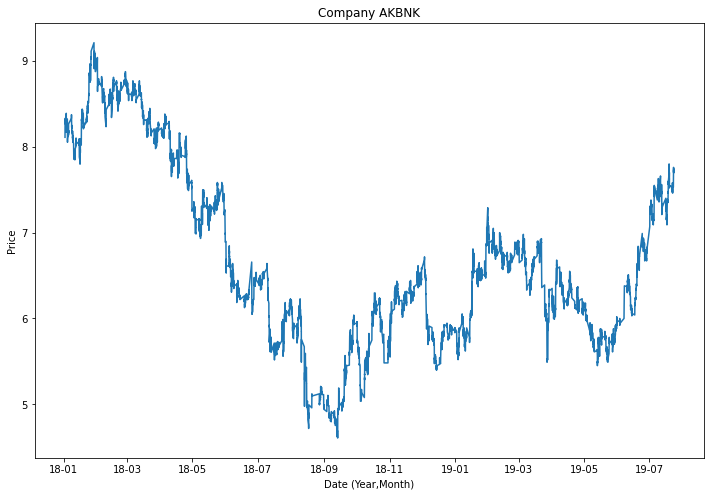

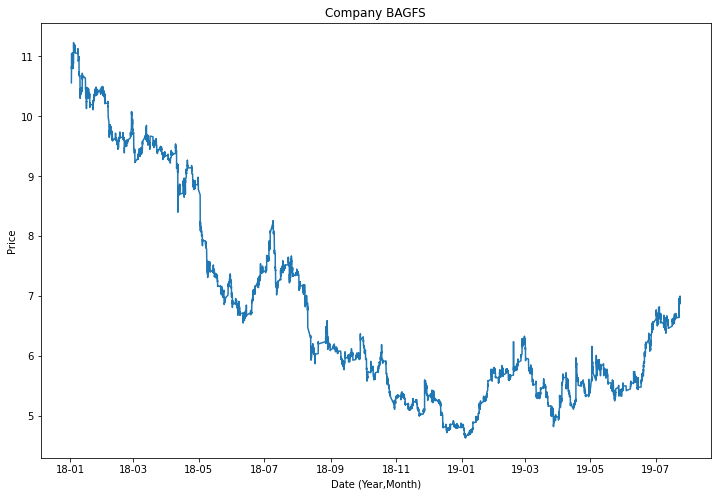

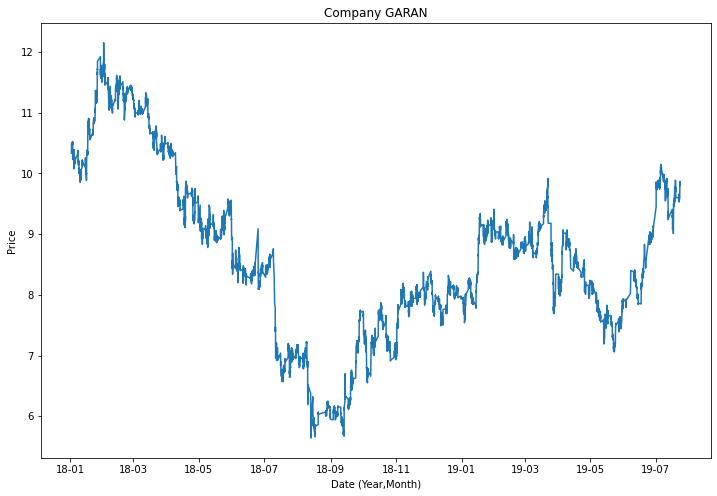

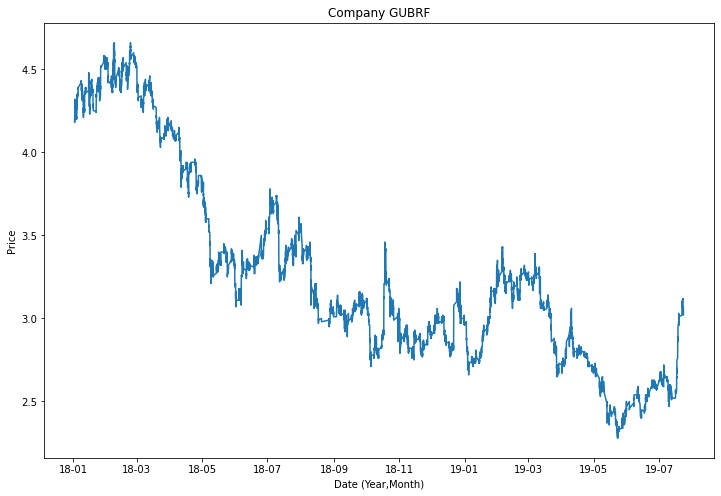

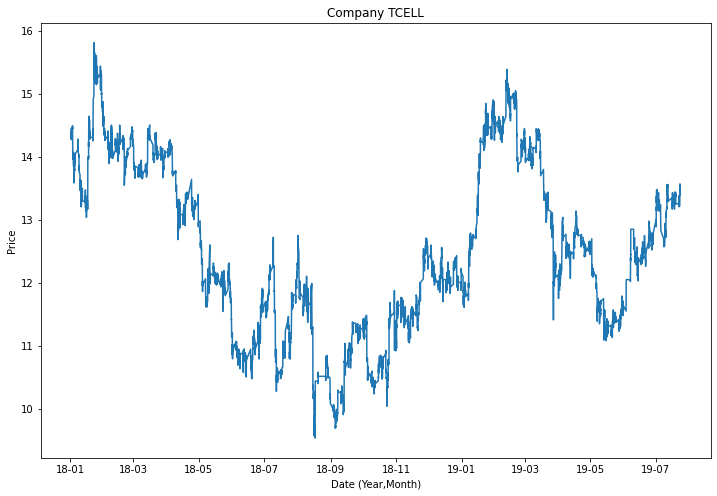

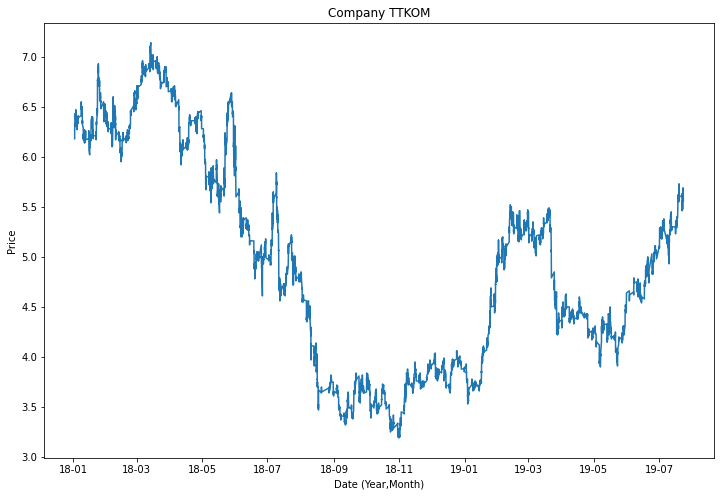

In [215]:
for k,v in data_filtered2.groupby("short_name"):
    # Define Plots
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(v["timestamp"],v["price"])
    label = k
    ax.set(xlabel="Date (Year,Month)",ylabel="Price",title = "Company " +k)
    
    #Adjust X axis
    #ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
    ax.xaxis.set_major_formatter(DateFormatter("%y-%m"))
    plt.show()

In [19]:
# Data groupped for boxplots in monthly basis
groupped_data = data_filtered2.groupby(by = [data_filtered2.timestamp.dt.year,
                                             data_filtered2.timestamp.dt.month])

Moreover, data points ranging between start of 2018 and end of 2019 are included in this analysis solely. Graphs shown below are box plots of stock prices with breakdowns of company and month. 

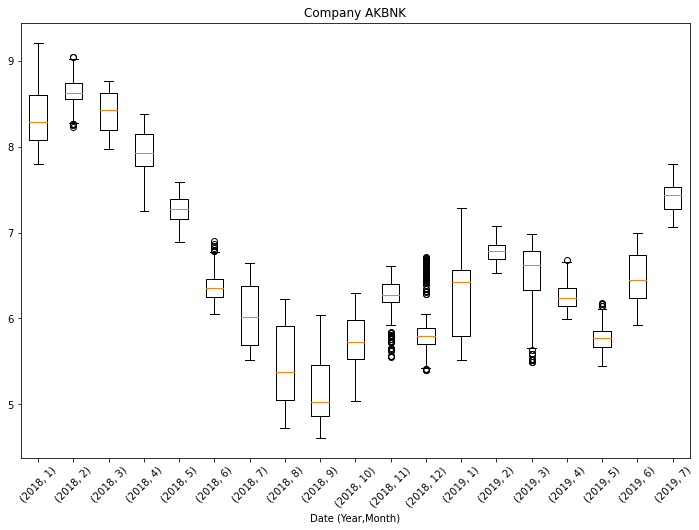

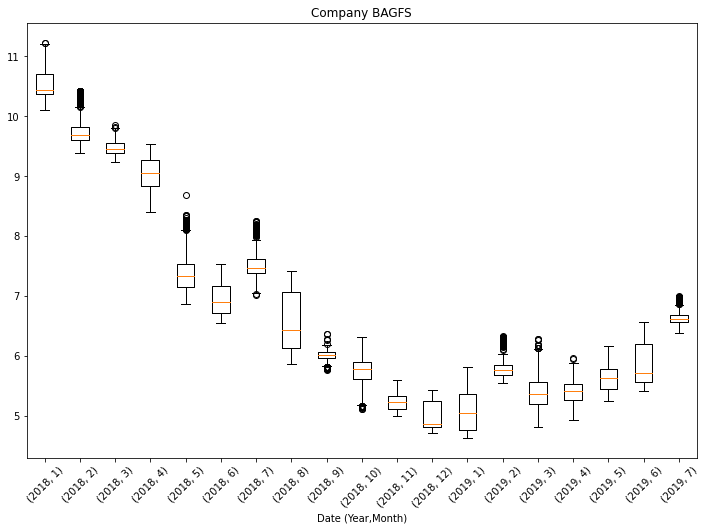

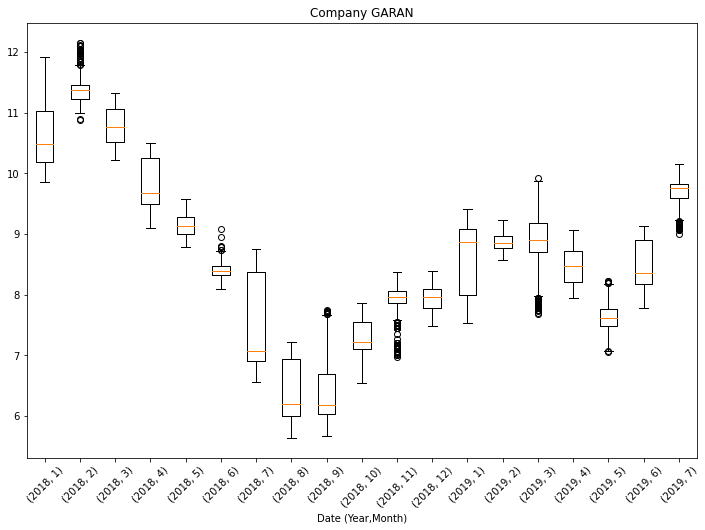

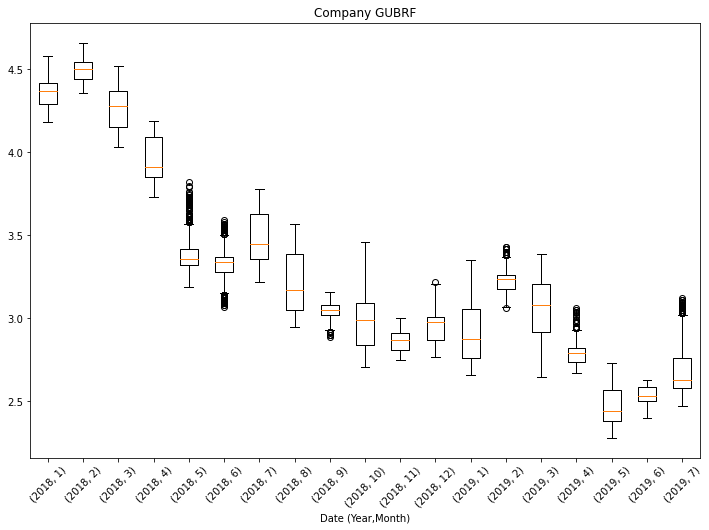

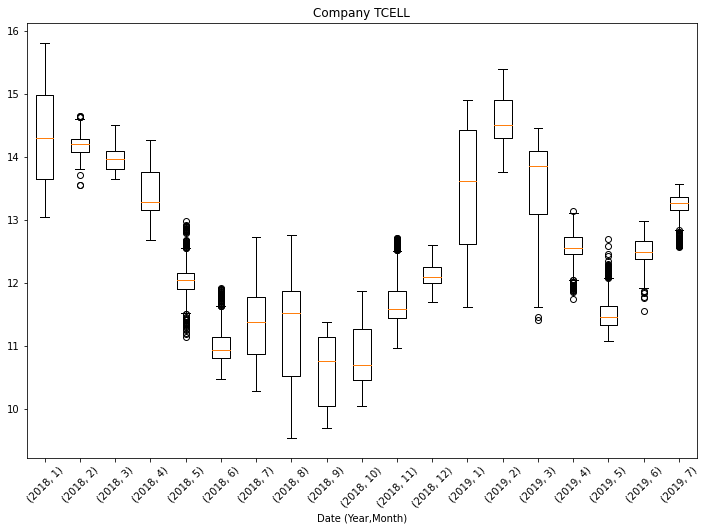

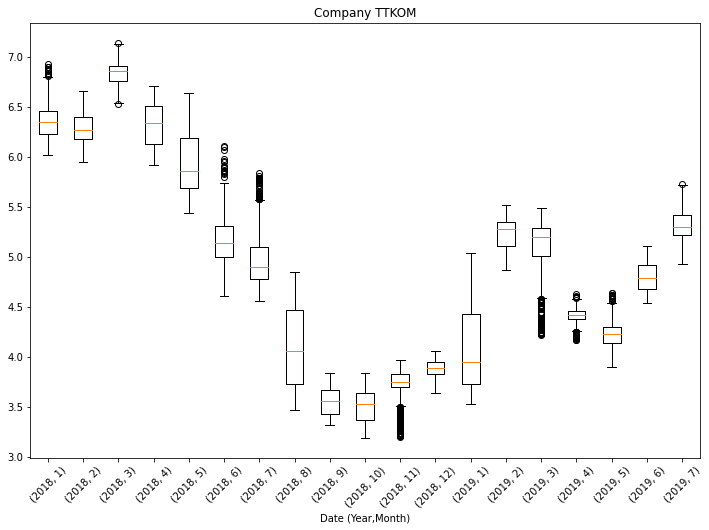

In [ ]:
# Company,Year,Month based Boxplot
for k,v in data_filtered2.groupby("short_name"):

    groupped_data = v.groupby(by = [v.timestamp.dt.year,
                                             v.timestamp.dt.month])
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(groupped_data.apply(lambda x: x.price.values))
    ax.set_xticklabels(groupped_data.groups.keys(),rotation = 45)
    plt.title(("Company "+ k))
    plt.xlabel("Date (Year,Month)")
    plt.show()

In [21]:
import numpy as np

In [121]:
data_filtered2 = data_filtered2.reset_index()

In [122]:
keys = [data_filtered2.short_name,
        data_filtered2.timestamp.dt.year,
        data_filtered2.timestamp.dt.month]

In [123]:
monthly_mean = data_filtered2.groupby(by=keys).agg(mean=("price","mean"),std=("price","std"))

In [124]:
monthly_mean.index.names = ["short_name","year","month"]

In [125]:
monthly_mean.reset_index()

,short_name,year,month,mean,std
0,AKBNK,2018,1,8.366439,0.366458
1,AKBNK,2018,2,8.639229,0.146385
2,AKBNK,2018,3,8.415934,0.225456
3,AKBNK,2018,4,7.941114,0.232129
4,AKBNK,2018,5,7.266919,0.155861
...,...,...,...,...,...
109,TTKOM,2019,3,5.066968,0.348600
110,TTKOM,2019,4,4.406288,0.092859
111,TTKOM,2019,5,4.225658,0.148371
112,TTKOM,2019,6,4.805591,0.150924


In [127]:
data_filtered2["year"] = data_filtered2.timestamp.dt.year
data_filtered2["month"] = data_filtered2.timestamp.dt.month

In [128]:
keys2 = ["short_name","year","month"]

In [129]:
final = pd.merge(data_filtered2,monthly_mean,on=keys2,how="left")

In [130]:
final.head()

,short_name,timestamp,price,year,month,mean,std
0,AKBNK,2018-01-02 06:45:00+00:00,8.1102,2018,1,8.366439,0.366458
1,AKBNK,2018-01-02 07:00:00+00:00,8.1678,2018,1,8.366439,0.366458
2,AKBNK,2018-01-02 07:15:00+00:00,8.2007,2018,1,8.366439,0.366458
3,AKBNK,2018-01-02 07:30:00+00:00,8.1842,2018,1,8.366439,0.366458
4,AKBNK,2018-01-02 07:45:00+00:00,8.2418,2018,1,8.366439,0.366458


In [131]:
condition =((final.price>=(final["mean"]-final["std"]*3)) &
            (final.price<=(final["mean"]+final["std"]*3)))

In [132]:
outliers = final[condition==0]

In [133]:
outliers.to_csv("outliers.csv")

In [136]:
final["is_valid"] = np.where(condition,1,0)

In [154]:
final["color"] = final["is_valid"].map({0: 'blue', 1: 'red'}) 

In [138]:
final[final.is_valid==0]

,short_name,timestamp,price,year,month,mean,std,is_valid
3286,AKBNK,2018-06-01 06:45:00+00:00,6.8976,2018,6,6.376941,0.167791,0
6402,AKBNK,2018-11-01 06:45:00+00:00,5.6451,2018,11,6.270637,0.172541,0
6403,AKBNK,2018-11-01 07:00:00+00:00,5.6365,2018,11,6.270637,0.172541,0
6404,AKBNK,2018-11-01 07:15:00+00:00,5.5679,2018,11,6.270637,0.172541,0
6405,AKBNK,2018-11-01 07:30:00+00:00,5.5507,2018,11,6.270637,0.172541,0
...,...,...,...,...,...,...,...,...
66487,TTKOM,2018-11-01 07:30:00+00:00,3.2100,2018,11,3.726979,0.164815,0
66488,TTKOM,2018-11-01 07:45:00+00:00,3.2000,2018,11,3.726979,0.164815,0
66489,TTKOM,2018-11-01 08:00:00+00:00,3.2200,2018,11,3.726979,0.164815,0
66490,TTKOM,2018-11-01 08:15:00+00:00,3.2200,2018,11,3.726979,0.164815,0


As observed in graphs, outliers are more common at 06-2018 and 11-2018. After performing 3-sigma rule another visualization is utilized. Figures are shown below;

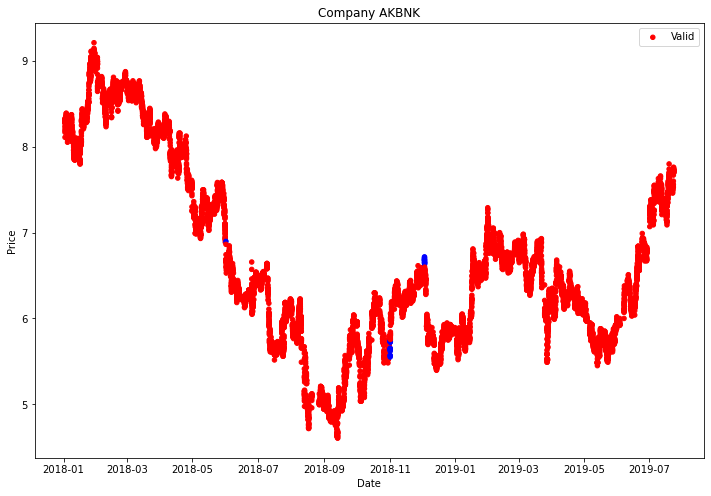

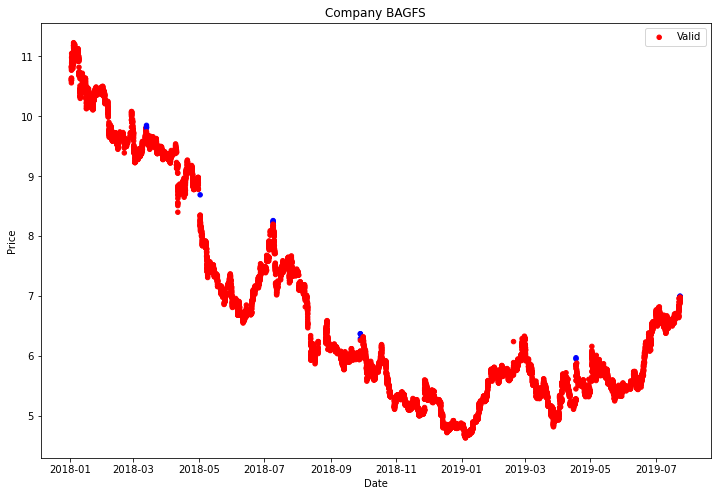

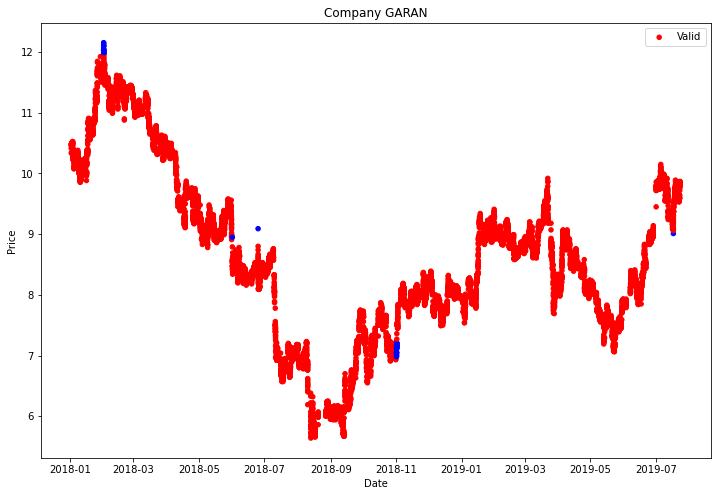

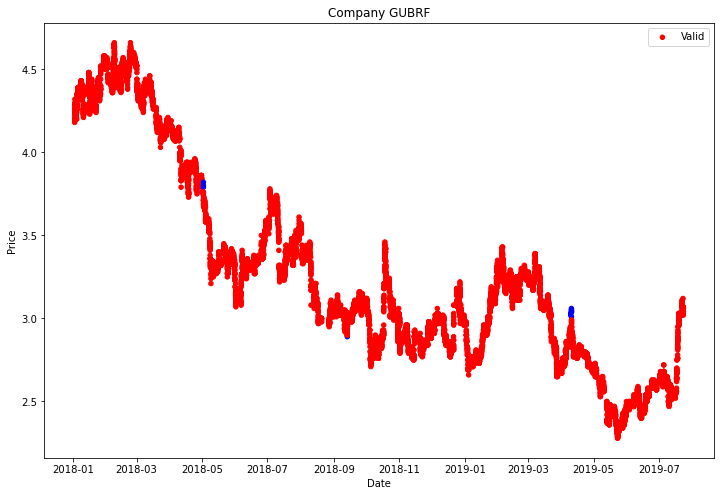

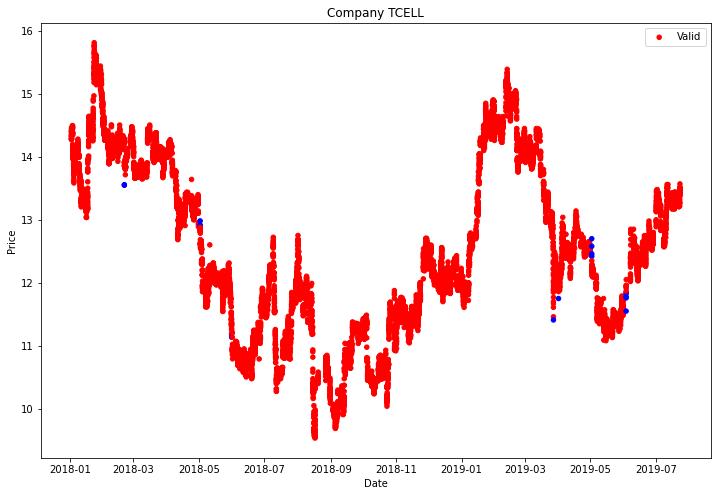

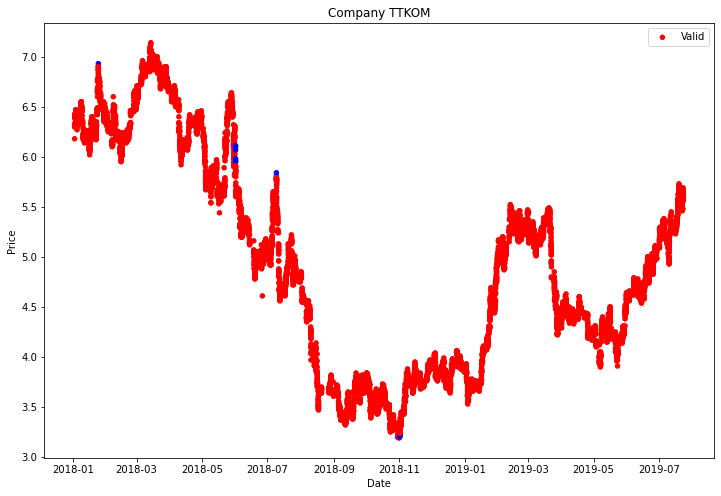

In [227]:
for k,v in final.groupby("short_name"):
    v.plot(x="timestamp",y="price",kind="scatter",c= "color",
          figsize=(12,8),xlabel="Date",
           ylabel="Price",title="Company "+k)
    plt.legend(["Valid","Outlier"],loc="upper right")
    plt.show()


Blue points in above graphs shows outlier data points after performing 3-sigma rule for each company and for each month. There are a total of 141 outlier values after 3-sigma operation. These outlier data points are generally cumulated at 05-2018, 06-2018, 11-2018, 12-2018, 04-2019, 05-2019. To further analyze, below table is prepared;

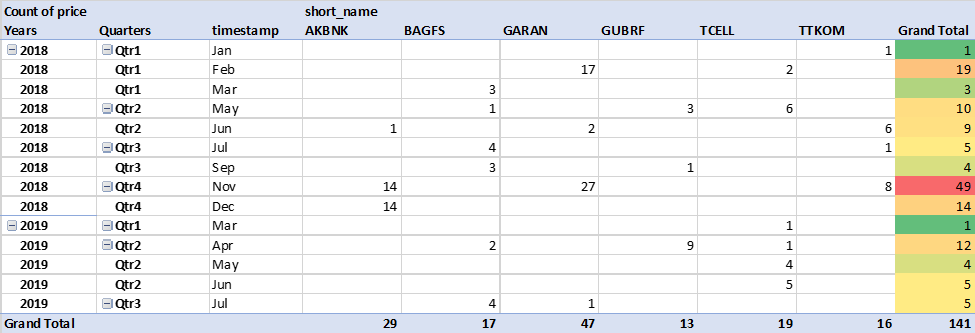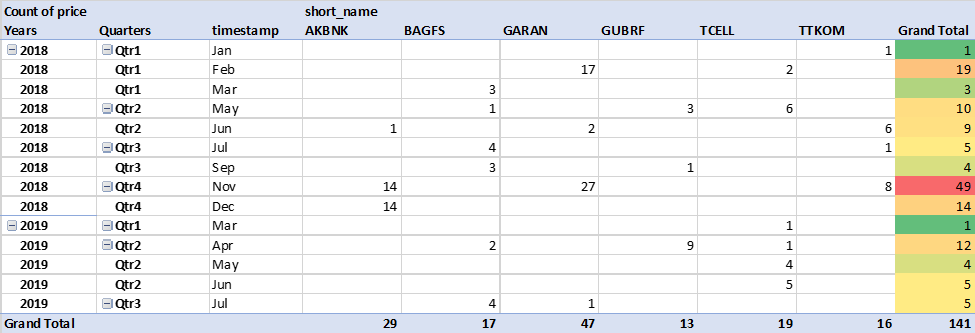

Now, one can see that most anomalies occured at 11-2018, 02-2018, 12-2018, 04-2019, 05-2018, 06-2018 respectively. One last breakdown is needed before further analysis, and this is whether the outlier is larger or lower than the mean of the month.

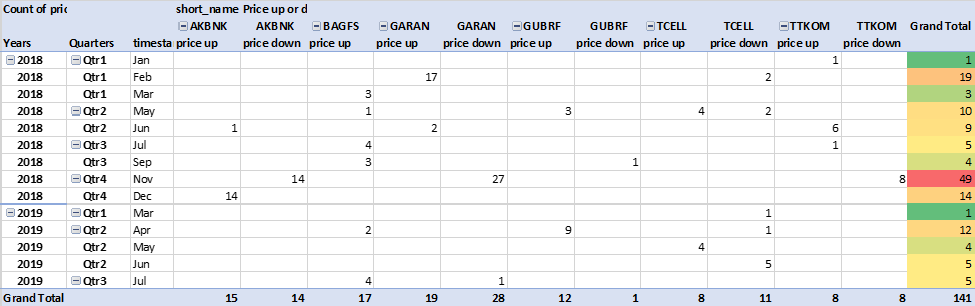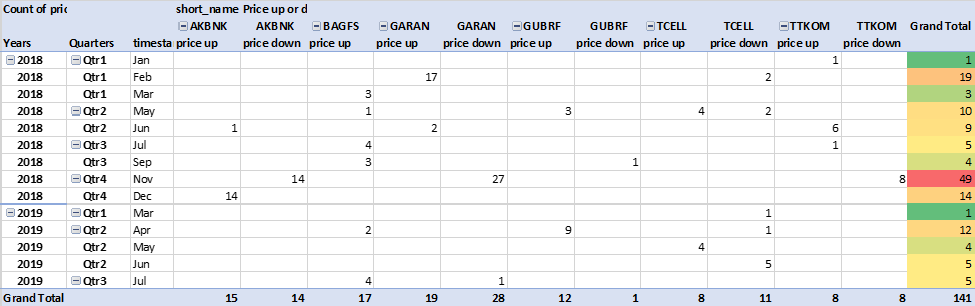

## 3- Explanation of Outliers:

**Banking Sector:**

The 17 outliers in Garanti Bank's stock price that exceeded the upper control limit in February 2018 can be attributed to a number of factors coming together at the time. First, there was the difference in monetary policy between the US Federal Reserve (FED) and the Central Bank of the Republic of Turkey. In January 2018, the FED raised interest rates, causing the US dollar to appreciate and the USD/TRY exchange rate to rise. This exchange rate movement had a positive impact on the Turkish stock market, which potentially boosted the share price of Garanti Bank. In addition, the market at the time was buzzing with news and rumors about BBVA's possible purchase of Garanti Bank. Uncertainties about the purchase may have led to increased trading activity and affected stock prices.

27 outliers in Garanti Bank's share prices in November 2018, all below the lower control limit, can be linked to a combination of macroeconomic factors. First, there was a depreciation in the USD/TRY exchange rate, which means an appreciation of the Turkish Lira. This exchange rate appreciation may have had a negative impact on Garanti Bank's share prices, as it made the bank's deposits, which are usually in TL, more valuable. Secondly, the FED's decision to keep interest rates unchanged during the same time may have played a role in the drop in Garanti's stock prices. The Fed's decision to keep interest rates stable may lead to lower investments in developing markets and lower foreign investment inflows, which may affect the overall stock market.

The presence of significant anomalies in Akbank's share prices in December 2018, where all 16 outliers exceeded the upper control limit, can be linked to a certain event. This event was Akbank's decision to increase its authorized capital by 30% from TRY 4 billion to TRY 5.2 billion, as announced by Akbank in its Public Disclosure Platform (KAP) statement.



In [191]:
final["day"] = final.timestamp.dt.day

In [195]:
final[final.is_valid==0].loc[:,["short_name","year","month","day","color"]].groupby(["short_name","year","month","day"]).agg("count")

color
short_name year month day       
AKBNK      2018 6     1        1
                11    1       14
                12    3       14
BAGFS      2018 3     13       3
                5     2        1
                7     9        4
                9     28       3
           2019 4     17       2
                7     23       4
GARAN      2018 2     1       17
                6     1        1
                      25       1
                11    1       27
           2019 7     17       1
GUBRF      2018 5     2        3
                9     13       1
           2019 4     9        2
                      10       7
TCELL      2018 2     20       2
                5     2        4
                      31       2
           2019 3     27       1
                4     1        1
                5     2        4
                6     3        5
TTKOM      2018 1     24       1
                6     1        6
                7     9        1
                11    1        8

In [200]:
garan_data = pd.read_csv("multiTimeline.csv",header=1)

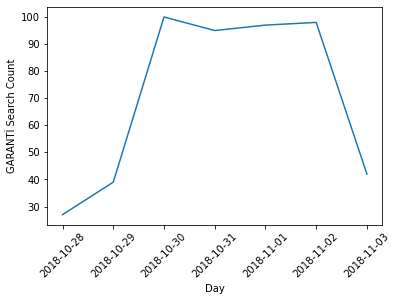

In [210]:
garan_data.plot(x="Day",y="GARANTİ: (Türkiye)",legend=0)
plt.xticks(rotation = 45)
plt.ylabel("GARANTİ Search Count")
plt.show()

To examine the correlation between “search counts” and “stock prices”, Google Trends data is utilized. As maximum number of outliers observed is GARAN(11-2018), with 27 outlier values; search count data of the related days is downloaded. Looking above graph; one can see that the time period, stock prices of GARAN went down, is when the search counts reached maximum. Thus, it can be said that either stock prices and search counts are correlated or they have causality relation.

## 4- References

- https://www.bloomberght.com/akbank-30-bedelli-sermaye-artirimina-gidecek-2178220-amp
- ChatGPT